# Tutorial on the Calculation of tight-binding Parameters

Learn to use the Linear Combination of Atomic Orbitals (LCAO) approach with Slater–Koster two-center interaction integrals and Harrison-type expressions. As an example we consider the geometries from PubChem, RCSB PDB and Biovia. 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/1_Tight_Binding_Parameters.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

# Flags
save = False          # Set to True to enable saving results (currently unused in this script)
verbose = True        # Set to True to enable detailed logging

## Setup

In [2]:
import os
import importlib.util

# Check if the 'qDNA' package is already installed
qDNA_installed = importlib.util.find_spec('qDNA') is not None

if qDNA_installed:
    if verbose:
        print("Package 'qDNA' is already installed.")
        # Optional: Uncomment the next line to display qDNA package information
        # %pip show qDNA
else:
    # Install 'qDNA' package if not installed
    %pip install qDNA
    if verbose:
        print("Successfully installed the 'qDNA' package.")

Package 'qDNA' is already installed.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from qDNA import ROOT_DIR as ROOT_DIR_QDNA

# Use the current working directory as the root
ROOT_DIR = os.getcwd()

# Define directories for data and figures
DATA_DIR = os.path.join(ROOT_DIR, "data", "my_geometries")
FIG_DIR = os.path.join(ROOT_DIR_QDNA, "qDNA", "data", "figures_tutorials")

# Ensure the directories exist (create them if they don't already exist)
os.makedirs(DATA_DIR, exist_ok=True)

SAVE_DIR = os.path.join(os.getcwd(), "my_figures")  # Directory for plots 
if save:
    os.makedirs(os.path.join(os.getcwd(), SAVE_DIR), exist_ok=True)

if verbose:
    # Print the status of the directories for debugging purposes
    print(f"Data directory: '{DATA_DIR}' is ready.")
    print(f"Figures directory: '{FIG_DIR}' is ready.")
    print(f"Save directory: '{SAVE_DIR}' is ready.")

Data directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA-notebooks\tutorials\data\my_geometries' is ready.
Figures directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA\qDNA\data\figures_tutorials' is ready.
Save directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA-notebooks\tutorials\my_figures' is ready.


## Analyzing the 1BNA Structure from RCSB PDB

The **RCSB Protein Data Bank (PDB)** is a widely used, free repository for 3D structures of biological molecules like proteins and DNA. It plays a crucial role in molecular biology, computational biology, and structural bioinformatics. 

In this tutorial, we will use the *1BNA* structure, a B-form DNA dodecamer (`CGCGAATTCGCG`). This structure serves as a reference model for studying DNA conformation, base pairing and interactions with proteins, drugs, and other molecules.

---

**Workflow for Using the 1BNA Structure**

To prepare this structure for simulations and analysis, we will follow these steps:

1. Download the PDB File
   Visit the [1BNA entry on RCSB.org](https://www.rcsb.org/structure/1BNA) and download the file in `.pdb` format.  
   Save the downloaded file to your designated data directory (`DATA_DIR`).

2. Prepare the Structure 
   Use **Biovia Visual Studio** (or any molecular modeling tool of your choice) to refine the structure:
   - Remove the sugar-phosphate backbone or water molecules (optional, based on your study goals).  
   - Add hydrogens to complete the structure.
   
   Save the modified structure in `.pdb` format.

4. Run the Code Below
   Apply the following Python code to process the modified `.pdb` file.

In [5]:
from qDNA import convert_pdb_to_xyz, calc_tb_params

filename = "1BNA"
tb_model_name = 'ELM'

# convert PDB file into several XYZ files
filepath_pdb = os.path.join(DATA_DIR, f"{filename}.pdb")
convert_pdb_to_xyz(filepath_pdb)

# calculate tight-binding parameters
directories = [os.path.join(DATA_DIR, filename)]
HOMO_dict, LUMO_dict = calc_tb_params(directories, tb_model_name)

In [6]:
# save to QuantumDNA 

from qDNA import wrap_save_tb_params

notes = "Geometries from RCSB 1BNA"

wrap_save_tb_params(HOMO_dict, filename, "hole", tb_model_name, unit="meV", notes=notes)
wrap_save_tb_params(LUMO_dict, filename, "electron", tb_model_name, unit="meV", notes=notes)

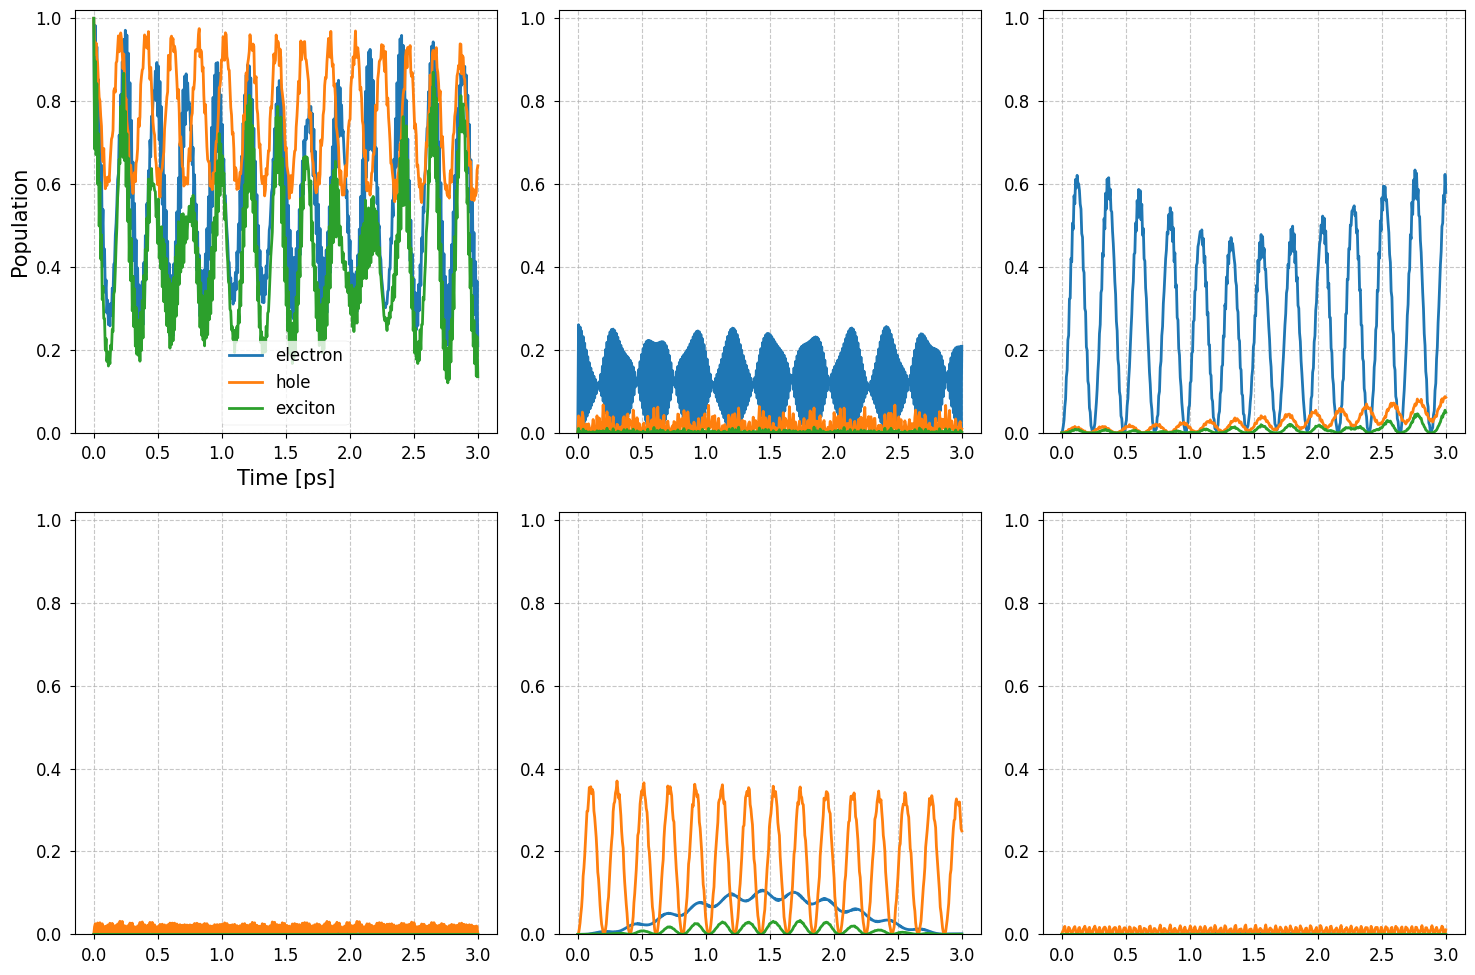

In [7]:
# run calculations in the well known way 

from qDNA import get_me_solver, plot_pops

upper_strand = ['02G', '03C', '04G']
lower_strand = ['23C', '22G', '21C']
kwargs = dict( relaxation=False )

me_solver = get_me_solver(upper_strand, tb_model_name, source=filename, lower_strand=lower_strand, relaxation=False)
fig, ax = plot_pops(me_solver)

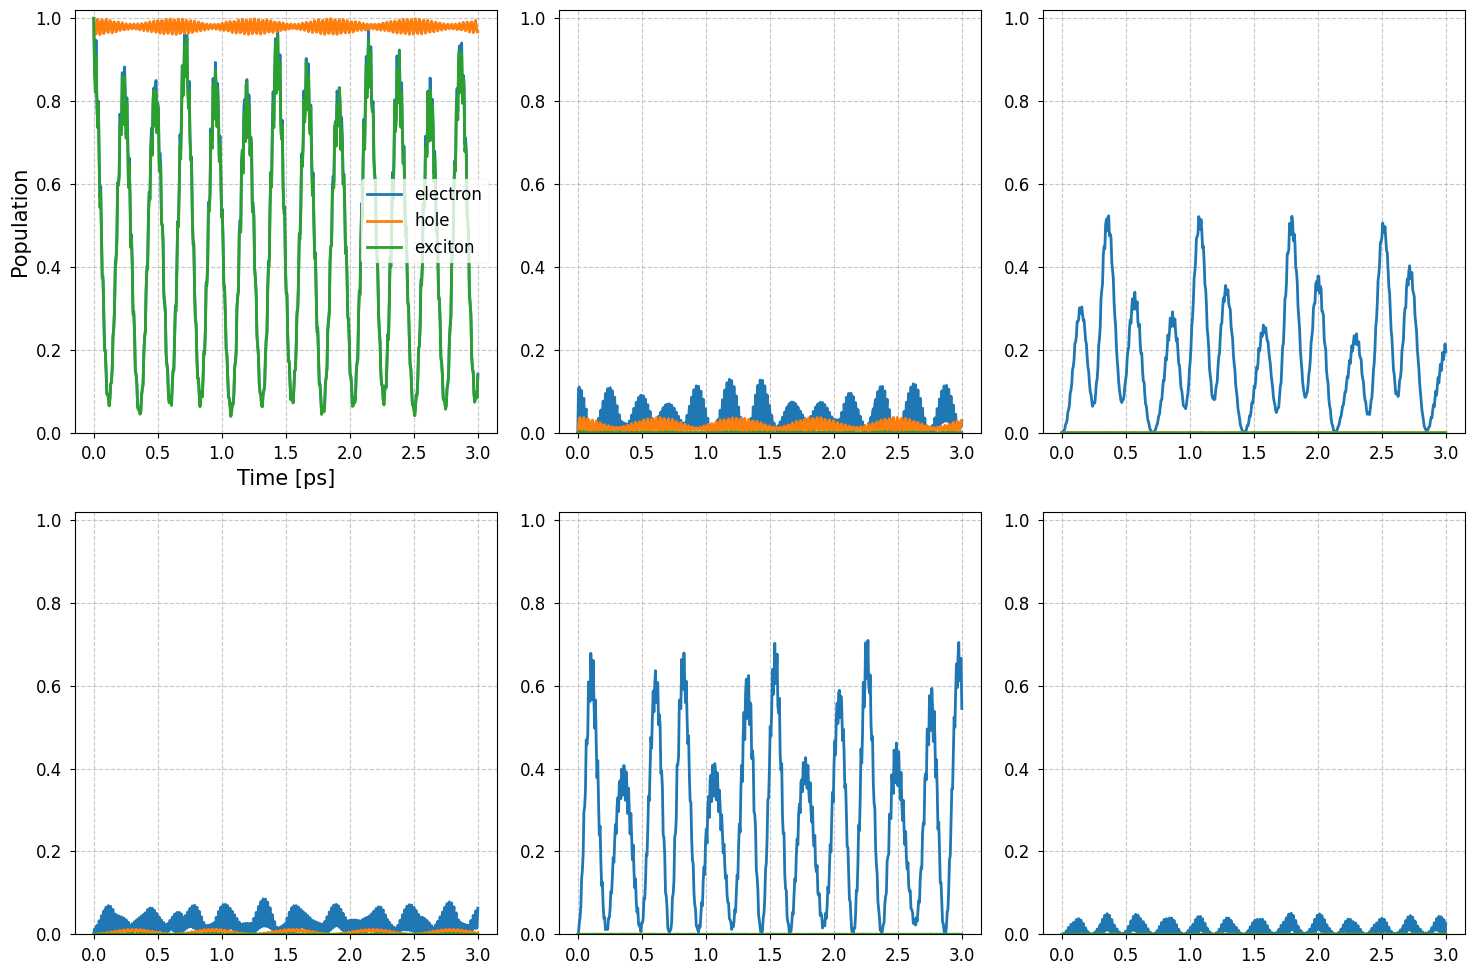

In [8]:
upper_strand = 'GCG'
lower_strand = 'CGC'

me_solver = get_me_solver(upper_strand, tb_model_name, source='Hawke2010', lower_strand=lower_strand, relaxation=False)
fig, ax = plot_pops(me_solver)

## Geometries from Biovia Discovery Studio

In [5]:
from qDNA import convert_pdb_to_xyz, calc_tb_params

# 'ATTAAGCCGGTCTGACA'
filename = "uni_dimer_seq"
# 'GCGGACAGATAA'
# filename = "uni_dimer_seq_2"
tb_model_name = 'ELM'

# convert PDB file into a folder with several XYZ files
filepath_pdb = os.path.join(DATA_DIR, "Biovia", f"{filename}.pdb")
convert_pdb_to_xyz(filepath_pdb)

# calculate tight-binding parameters
directories = [os.path.join(DATA_DIR, "Biovia", filename)]
HOMO_dict, LUMO_dict = calc_tb_params(directories, tb_model_name)

In [6]:
# save to QuantumDNA 

from qDNA import wrap_save_tb_params

notes = "Geometries from Biovia"

wrap_save_tb_params(HOMO_dict, filename, "hole", tb_model_name, unit="meV", notes=notes)
wrap_save_tb_params(LUMO_dict, filename, "electron", tb_model_name, unit="meV", notes=notes)

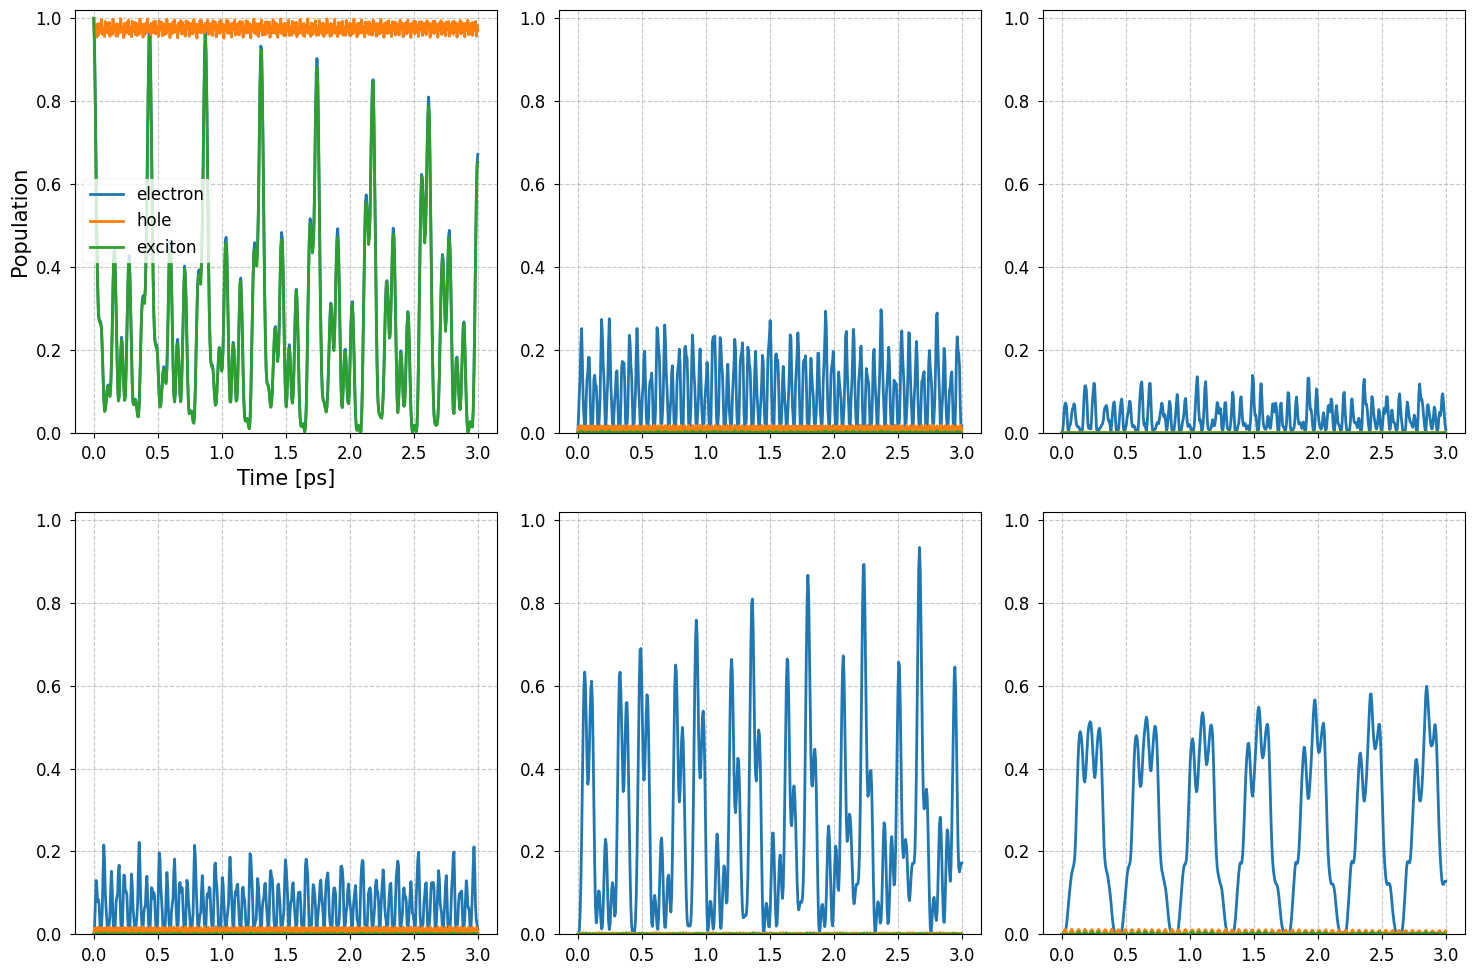

In [8]:
# run calculations in the well known way 

from qDNA import get_me_solver, plot_pops

upper_strand = ['03T', '04A', '05A']
lower_strand = ['32A', '31T', '30T']
kwargs = dict( relaxation=False )

me_solver = get_me_solver(upper_strand, tb_model_name, source=filename, lower_strand=lower_strand, relaxation=False)
fig, ax = plot_pops(me_solver)

## Geometries from PubChem

https://www.ncbi.nlm.nih.gov/

In [16]:
from qDNA import convert_json_to_xyz, load_xyz, Base

filename = "A"

convert_json_to_xyz(filename, os.path.join(DATA_DIR, "PubChem"))
xyz_identifier, xyz_data = load_xyz(filename, os.path.join(DATA_DIR, "PubChem"))
base = Base(xyz_identifier, xyz_data)

In [17]:
print("TB parameters")
print("-------------------------------")
print(f"E_HOMO1: {base.E_HOMO}")
print(f"E_LUMO1: {base.E_LUMO}")

TB parameters
-------------------------------
E_HOMO1: -8.4407322055674
E_LUMO1: -4.353816583266132
